<a href="https://colab.research.google.com/github/kchamarty/pythonproject/blob/patienctchurn/kumarchamarty_pythonv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the required Packages**

In [0]:
#importing packages

import pandas as pd # Load the pandas libraries with alias 'pd'
import matplotlib.pyplot as plt # Load the matplotlib.pyplot libraries with alias 'plt' 
%matplotlib inline
import seaborn as sns # Load the seaborn libraries with alias 'sns'
sns.set()

from pandas_profiling import ProfileReport as pr

# **Data Importing**


---

We have two data sets one containing the patient doctor visit information and the other containing the status of the patient active or not

In [0]:
patient_doc_visit_df = pd.read_csv("https://raw.githubusercontent.com/kchamarty/pythonproject/master/data/PatientDoctorVisit.csv");

In [0]:
patient_churn_df = pd.read_csv(r"https://raw.githubusercontent.com/kchamarty/pythonproject/master/data/PatientDetails.csv");

In [0]:
patient_train_df = pd.read_csv(r"https://raw.githubusercontent.com/kchamarty/pythonproject/master/data/Train_Patient_Churn.csv");

patient_test_df = pd.read_csv(r"https://raw.githubusercontent.com/kchamarty/pythonproject/master/data/Test_Patient_Churn.csv");

#**Column names**

In [0]:
patient_doc_visit_df.columns

Index(['transaction_date', 'practice_id', 'patient_id', 'provider_id',
       'transaction_type', 'proceedure_code', 'proceedure_description',
       'amount'],
      dtype='object')

In [0]:
patient_churn_df.columns

Index(['practice_id', 'patient_id', 'gender', 'age', 'zip',
       'primary_insurance_company_id', 'secondary_insurance_company_id',
       'patient_referral', 'other_referral', 'FirstVisit', 'LastVisit',
       'DaysLastVisit', 'Chrun'],
      dtype='object')

In [0]:
[x for x in patient_train_df.columns]

['practice_id',
 'patient_id',
 'gender',
 'age',
 'zip',
 'primary_insurance_company_id',
 'secondary_insurance_company_id',
 'patient_referral',
 'other_referral',
 'FirstVisit',
 'LastVisit',
 'DaysLastVisit',
 'Chrun']

#**Cleaning the data set**


*   STEP 1: Identify duplicates and get rid of them. 1: Identify duplicates and get rid of them.
*   STEP 2: PROCESS MISSING VALUES.
*   STEP 3: 




In [0]:
print(patient_doc_visit_df.count())
print(patient_doc_visit_df[patient_doc_visit_df.duplicated(keep='first')].count())

transaction_date          573401
practice_id               573401
patient_id                573401
provider_id               573401
transaction_type          573401
proceedure_code           570073
proceedure_description    564052
amount                    573401
dtype: int64
transaction_date          23151
practice_id               23151
patient_id                23151
provider_id               23151
transaction_type          23151
proceedure_code           23033
proceedure_description    23035
amount                    23151
dtype: int64


In [0]:
patient_doc_visit_df.drop_duplicates(inplace=True)
patient_doc_visit_df.count()

transaction_date          550250
practice_id               550250
patient_id                550250
provider_id               550250
transaction_type          550250
proceedure_code           547040
proceedure_description    541017
amount                    550250
dtype: int64

# Identifying the clean records

In [0]:
A=set()
for x,y in zip(patient_churn_df['practice_id'],patient_churn_df['patient_id']):
  A.add((x,y))
len(A)

25000

In [0]:
patient_churn_df[['practice_id','patient_id']].drop_duplicates().count()


practice_id    25000
patient_id     25000
dtype: int64

In [0]:
patient_doc_visit_df[['practice_id','patient_id']].drop_duplicates().count()


practice_id    42172
patient_id     42172
dtype: int64

In [0]:
B=set()
for x,y in zip(patient_doc_visit_df['practice_id'],patient_doc_visit_df['patient_id']):
  B.add((x,y))
len(B)

42172

In [0]:
print(len(A & B))
print(len(A - B))
print(len(B - A))

22806
2194
19366


In [0]:
c= A&B
for i in range(0,10):
  print(c.pop())

print(type(c));

common_df = pd.DataFrame(c);
common_df.columns =['practice_id','patient_id']

print(common_df.head())
print(common_df.count())

('D24402', 6135)
('D10551', 15648)
('D17435', 15167)
('D8066', 52773)
('D10745', 22593)
('D24402', 7762)
('D24402', 6201)
('D10551', 18171)
('D8066', 55574)
('D10551', 20304)
<class 'set'>
  practice_id  patient_id
0       D8061        1612
1      D30507       15879
2      D20674        3570
3      D10551       13583
4      D10745       24766
practice_id    22796
patient_id     22796
dtype: int64


# Creating my final study frame work

In [0]:
patient_churn_study_df=patient_churn_df.merge(common_df,how='inner',on=['practice_id','patient_id']).drop_duplicates()
patient_churn_study_df.FirstVisit=pd.to_datetime(patient_churn_study_df.FirstVisit)
patient_churn_study_df.LastVisit=pd.to_datetime(patient_churn_study_df.LastVisit)
patient_churn_study_df['FirstVisit_year']=pd.DatetimeIndex(patient_churn_study_df['FirstVisit']).year
patient_churn_study_df['FirstVisit_month']=pd.DatetimeIndex(patient_churn_study_df['FirstVisit']).month
patient_churn_study_df['FirstVisit_day']=pd.DatetimeIndex(patient_churn_study_df['FirstVisit']).day
patient_churn_study_df['LastVisit_year']=pd.DatetimeIndex(patient_churn_study_df['LastVisit']).year
patient_churn_study_df['LastVisit_month']=pd.DatetimeIndex(patient_churn_study_df['LastVisit']).month
patient_churn_study_df['LastVisit_day']=pd.DatetimeIndex(patient_churn_study_df['LastVisit']).day


In [0]:
patient_doc_visit_study_df=patient_doc_visit_df.merge(common_df,how='inner',on=['practice_id','patient_id']).drop_duplicates()
patient_doc_visit_study_df.transaction_date=pd.to_datetime(patient_doc_visit_study_df.transaction_date)
patient_doc_visit_study_df['transaction_year']=pd.DatetimeIndex(patient_doc_visit_study_df['transaction_date']).year
patient_doc_visit_study_df['transaction_month']=pd.DatetimeIndex(patient_doc_visit_study_df['transaction_date']).month
patient_doc_visit_study_df['transaction_day']=pd.DatetimeIndex(patient_doc_visit_study_df['transaction_date']).day

In [0]:
patient_churn_study_final_df=patient_churn_df.merge(patient_doc_visit_df,how='inner',on=['practice_id','patient_id']).drop_duplicates()
# patient_churn_study_final_df.FirstVisit=pd.to_datetime(patient_churn_study_df.FirstVisit)
# patient_churn_study_final_df.LastVisit=pd.to_datetime(patient_churn_study_df.LastVisit)
# patient_churn_study_final_df.transaction_date=pd.to_datetime(patient_churn_study_df.transaction_date)

## Descriptive Analysis of Study Framework

In [0]:
[patient_churn_study_df[x].value_counts() for x in patient_churn_study_df.columns if patient_churn_study_df[x].dtype=='O']
#patient_churn_study_df['patient_referral'].dtype=='O'

In [0]:
patient_churn_study_df.gender[(patient_churn_study_df.gender == 'F') | (patient_churn_study_df.gender =='Female')] = 'FEMALE'
patient_churn_study_df.gender[(patient_churn_study_df.gender == 'M')| (patient_churn_study_df.gender =='Male')] = 'MALE'
patient_churn_study_df.gender.value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


FEMALE    197738
MALE      173617
Name: gender, dtype: int64

In [0]:
print(patient_churn_study_df.proceedure_description.unique())
print(patient_churn_study_df.proceedure_code.unique())


['Limited Oral Previous Pat-Examination and Diagnosis'
 'Four films-Intraoral Bitewing' 'Two units of time-Scaling' ...
 'Biopsy - Soft Oral Tissue - Puncture'
 "Duplication & Transfer of Patient's Dental Record"
 'Space MaintainerBand TypeFixed BilateralSoldered Lin']
['1202' '2144' '11112' '11107' '23313' '23323' '23312' '23322' '23321'
 '27201' '99111' '23602' '33144' '1204' '71201' '92412' '23314' '92413'
 '16101' '2111' '1103' '11113' '11101' '11117' '2112' '2601' '11114'
 '12113' '12101' '1101' '2142' '23115' '23114' '23111' '2114' '29302'
 '66252' '2121' '11116' '11111' '14612' '1205' '2141' '23325' '2113'
 '23112' '92305' '96202' '72211' '72221' '23113' '21401' '23315' '2101'
 '33111' '27211' '42201' '23324' '2119' '23311' '71101' '71109' '12112'
 '33141' '20131' '2116' '77801' '1102' '15101' '92414' '23512' '66251'
 'Misc' '2115' 'MISC' '2102' '23601' '14611' '29101' '20121' '13401'
 '13211' '11115' '2143' '23414' '92433' '12111' '33134' '14502' '21402'
 '72231' '2117' '92415'

In [0]:
patient_churn_study_df.patient_referral.value_counts()

Walk by                   3528
Google                    2825
Dr in Building            2652
Walked by office          2414
internet                  1343
                          ... 
WHINFIELD ALLISON            1
Lang  Samantha    Miss       1
PODOLSKY JEANETTE            1
IMBEAU CLAUDE                1
Vira Iffat                   1
Name: patient_referral, Length: 1067, dtype: int64

# **Descriptive Analysis without using Pandas Profiling**

In [0]:
print('summary of data :\n')
print(patient_doc_visit_study_df.astype('object').describe().transpose())
print('\nsummary ofmissing values : \n')
print(patient_doc_visit_study_df.isnull().sum())



summary of data :

                         count unique                         top    freq
transaction_date        371766   1228         2017-02-22 00:00:00     585
practice_id             371766     11                      D10745   88331
patient_id              371766  19117                       14599     122
provider_id             371766    249                        DTRJ   16837
transaction_type        371766      2                   Procedure  371335
proceedure_code         370310    715                        1202   46922
proceedure_description  364046   2005  Polishing One Unit of Time   16094
amount                  371766   3602                          33   31117
transaction_year        371766      4                        2017   99605
transaction_month       371766     12                           1   33991
transaction_day         371766     31                          12   13239

summary ofmissing values : 

transaction_date             0
practice_id                  0
p

practice_id  transaction_year
D10551       2016                 924673.640
             2017                 800582.910
             2018                 715769.130
             2019                 788334.070
D10745       2016                1529253.130
             2017                1764245.850
             2018                1509020.070
             2019                1383619.770
D17435       2016                 162746.450
             2017                 149311.120
             2018                 141226.060
             2019                 155165.180
D20674       2016                 795837.660
             2017                 747194.970
             2018                  47533.200
D24402       2016                1649990.480
             2017                1655737.320
             2018                1405027.420
             2019                1140137.360
D30507       2016                 577228.940
             2017                 672406.550
             2018        

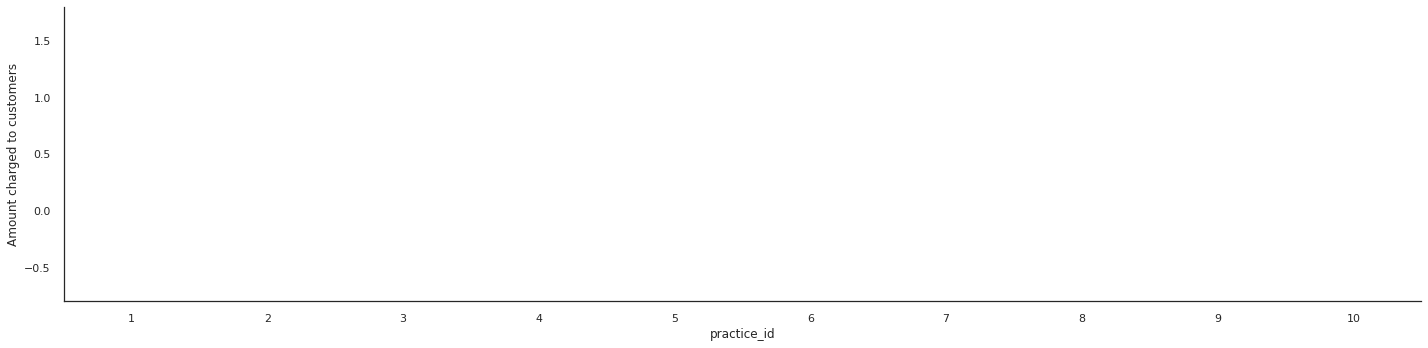

In [0]:
Anount_by_practice_per_year_df=patient_doc_visit_study_df.groupby(['practice_id','transaction_year']).amount.sum()

with sns.axes_style('white'):
    g = sns.catplot("practice_id", 'amount',data=patient_doc_visit_study_df, aspect=4.0, 
                       order=range(1,11))
    g.set_ylabels('Amount charged to customers')

# FInding Missing Values and fixing them accordingly


*   List item
*   List item



In [0]:
print(patient_churn_study_df.isnull().sum())


practice_id                            0
patient_id                             0
gender                               566
age                                    0
zip                                 3242
primary_insurance_company_id       70969
secondary_insurance_company_id    323444
patient_referral                  325045
other_referral                    341990
FirstVisit                             0
LastVisit                              0
DaysLastVisit                          0
Chrun                                  0
transaction_date                       0
provider_id                            0
transaction_type                       0
proceedure_code                     1460
proceedure_description              7724
amount                                 0
dtype: int64


# BootStrap function

In [0]:
#Definition of Bootstrap
#Choose a number of bootstrap samples to perform
#Choose a sample size
#For each bootstrap sample
#Draw a sample with replacement with the chosen size
#Calculate the statistic on the sample
#Calculate the mean of the calculated sample statistics.

def boot_samp_repl(df,sample_size, numberofsamples):
  bootsamples=dict();
  for n in range(1,numberofsamples+1):
    i = resample(df.index, replace=True, n_samples=sample_size, random_state=1)
    bootsamples["sample_{}".format(n)]=df.loc[i,:]
  return bootsamples

x=boot_samp_repl(patient_doc_visit_df,4,10)
x




{'sample_1':        transaction_date practice_id  ...       proceedure_description amount
 128037       11/20/2017       D8066  ...  Scaling Three Units of Time  123.0
 491755        6/24/2019       D8065  ...             Scaling 1/2 unit   22.0
 470924        6/22/2018       D8066  ...  Scaling Three Units of Time  126.0
 491263         7/9/2019       D8065  ...              Polish 1/2 unit   25.0
 
 [4 rows x 8 columns],
 'sample_2':        transaction_date practice_id  ...       proceedure_description amount
 128037       11/20/2017       D8066  ...  Scaling Three Units of Time  123.0
 491755        6/24/2019       D8065  ...             Scaling 1/2 unit   22.0
 470924        6/22/2018       D8066  ...  Scaling Three Units of Time  126.0
 491263         7/9/2019       D8065  ...              Polish 1/2 unit   25.0
 
 [4 rows x 8 columns],
 'sample_3':        transaction_date practice_id  ...       proceedure_description amount
 128037       11/20/2017       D8066  ...  Scaling Three

In [0]:
bootsamples

{'sample_1':        transaction_date practice_id  ...       proceedure_description amount
 128037       11/20/2017       D8066  ...  Scaling Three Units of Time  123.0
 491755        6/24/2019       D8065  ...             Scaling 1/2 unit   22.0
 470924        6/22/2018       D8066  ...  Scaling Three Units of Time  126.0
 491263         7/9/2019       D8065  ...              Polish 1/2 unit   25.0
 
 [4 rows x 8 columns],
 'sample_2':        transaction_date practice_id  ...       proceedure_description amount
 128037       11/20/2017       D8066  ...  Scaling Three Units of Time  123.0
 491755        6/24/2019       D8065  ...             Scaling 1/2 unit   22.0
 470924        6/22/2018       D8066  ...  Scaling Three Units of Time  126.0
 491263         7/9/2019       D8065  ...              Polish 1/2 unit   25.0
 
 [4 rows x 8 columns],
 'sample_3':        transaction_date practice_id  ...       proceedure_description amount
 128037       11/20/2017       D8066  ...  Scaling Three